In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy.stats.stats import pearsonr
from scipy import stats
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)
from matplotlib import figure
from scipy.stats import linregress


def plott(x, y1, y2, title):
    # create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    fig.set_figheight(5)
    fig.set_figwidth(20)
    ax.plot(x, y1,color = "#1f77b4")

    ax2=ax.twinx()
    ax2.plot(x, y2,color="#ff7f0e")
    plt.title(title)
    plt.show()
    
def get_events(filepath, ratiot, losst):
    data = pd.read_csv("cryptodatadownload/Binance_SOLUSDT_1h.csv", skiprows = 1).head(100)
    data = data[["unix","date", "open", "high", "low", "close", 'Volume USDT']]
    data['OC'] = abs(data.open - data.close)
    data['HL'] = abs(data.high - data.low)
    data['Ratio'] = data.OC/data.HL
    data['Loss'] = (data.close/data.open - 1)*100  # daily loss in percent

    events = data[(data.Ratio > ratiot)  & (data.Loss < losst)]
    lr = linregress(data.Loss, data["Volume USDT"])
    events['HF'] = (lr.slope*events.Loss + lr.intercept)/events["Volume USDT"]
    plt.figure(num=2, figsize=(13, 6))
    plt.scatter(100*events.HF, events.Loss, c='black', edgecolors='black', s=50)
    plt.xlabel('Human Factor [%]')
    plt.ylabel('Daily Loss [%]')
    plt.show()
    plott(data.unix,data.close, data.Ratio,"Close vs Ratio" )
    plott(data.unix,data.close, data.Loss,"Close vs Loss" )
    return data, events

https://quantatrisk.com/2016/04/05/emotional-quantum-entanglement-trading/?ihc_success_login=true

#### Emotional Quantum Entanglement

#### Ratio = |Open - Close| / |High - Low|
#### Loss = (close/open - 1) * 100

### 1 minute

##### SOL

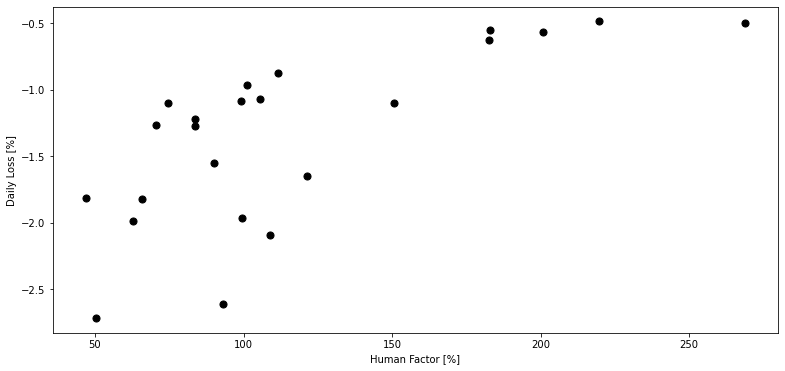

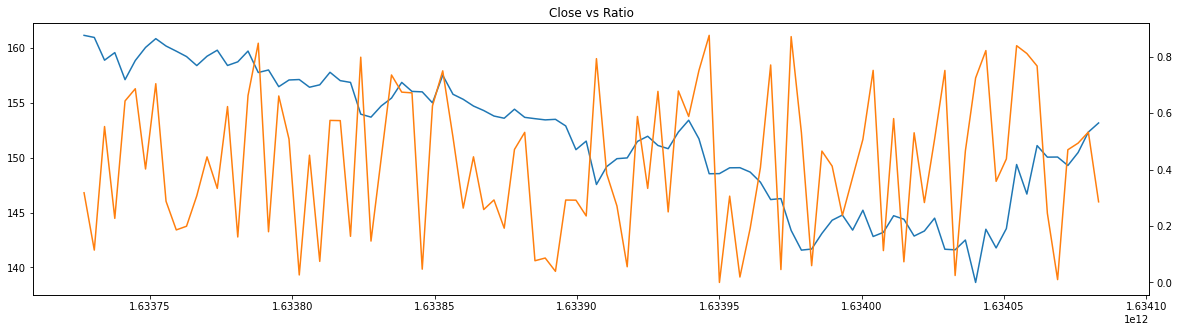

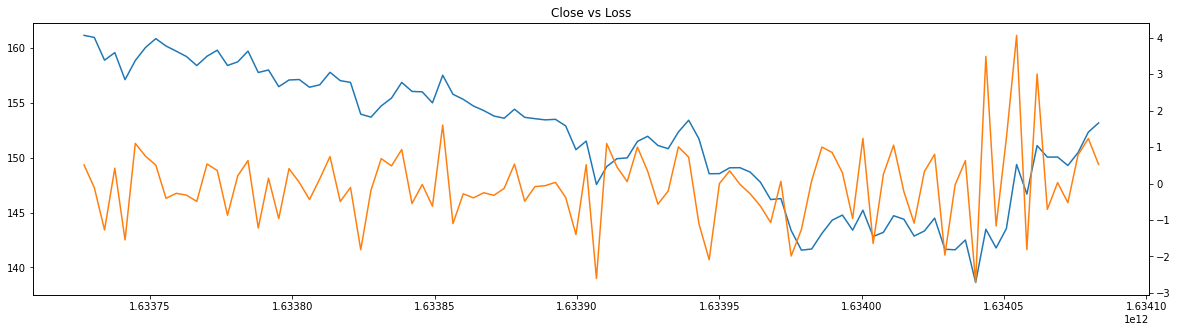

In [2]:
data, events = get_events("cryptodatadownload/Binance_SOLUSDT_minute.csv", 0.5, 0)

##### XRP

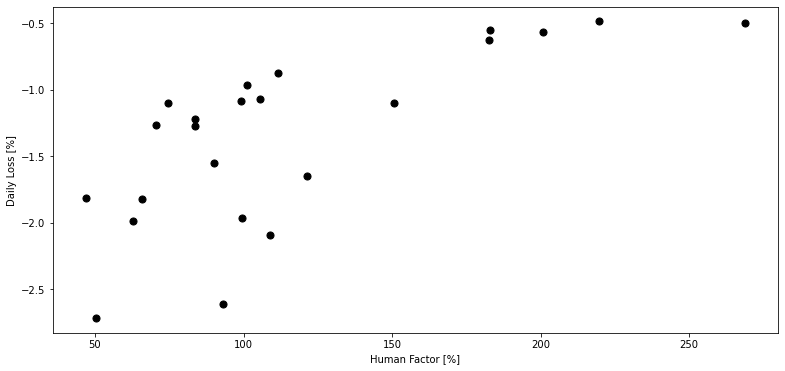

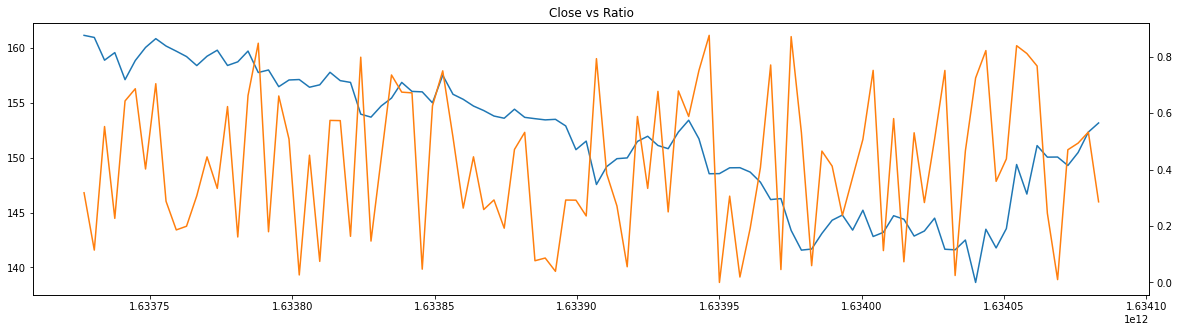

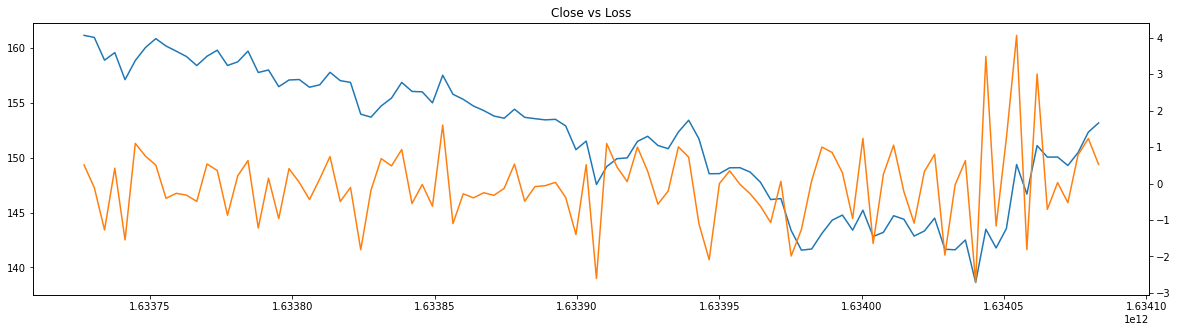

In [3]:
data, events = get_events("cryptodatadownload/Binance_XRPUSDT_minute.csv", 0.5, 0)

### 1 hour

##### SOL

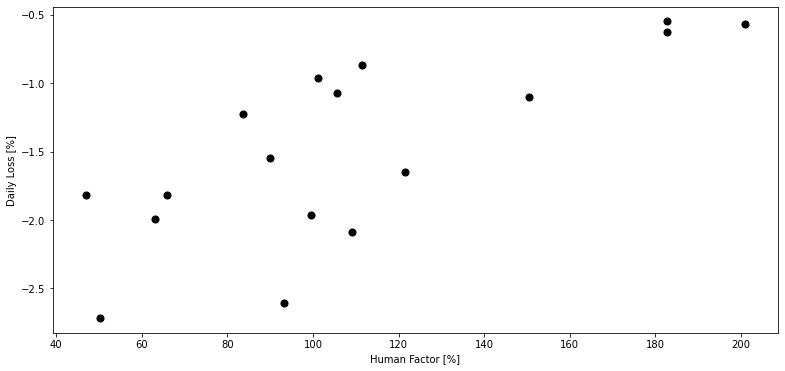

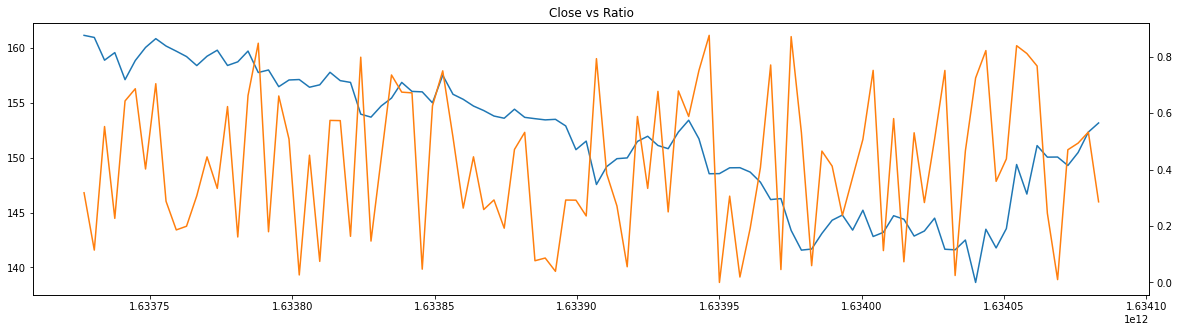

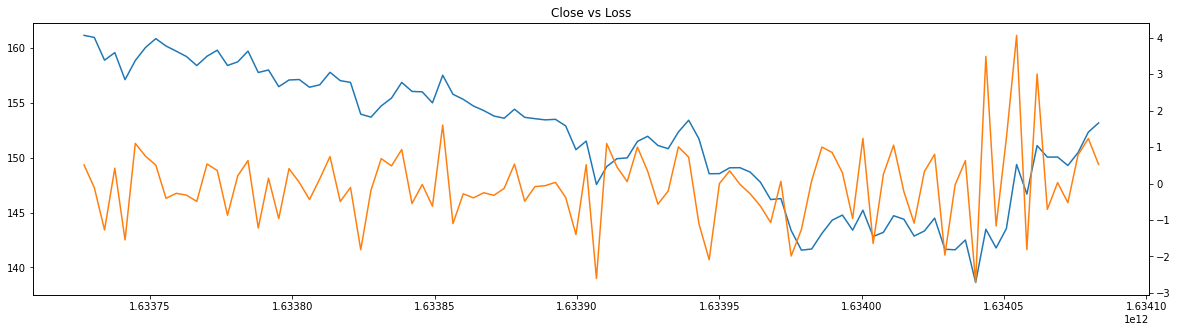

In [4]:
data, events = get_events("cryptodatadownload/Binance_SOLUSDT_1h.csv", 0.6, 0)

##### XRP

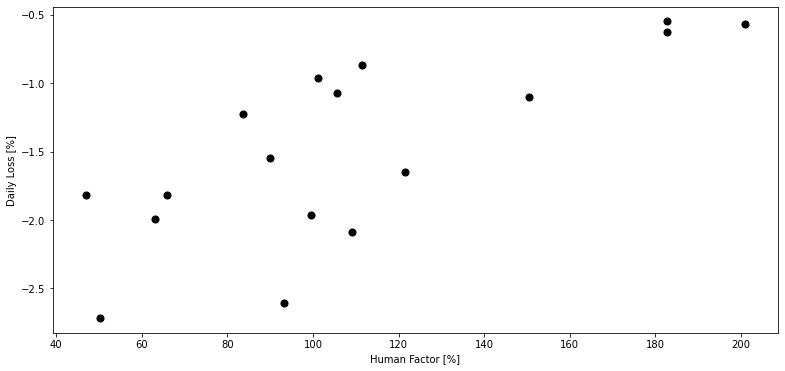

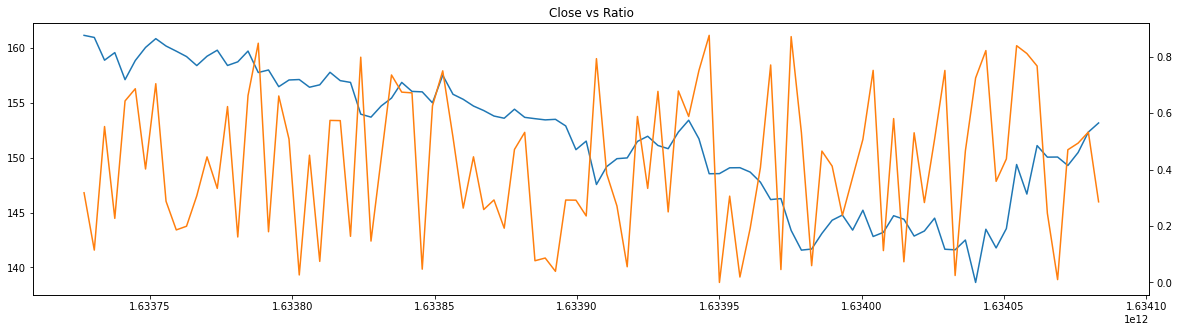

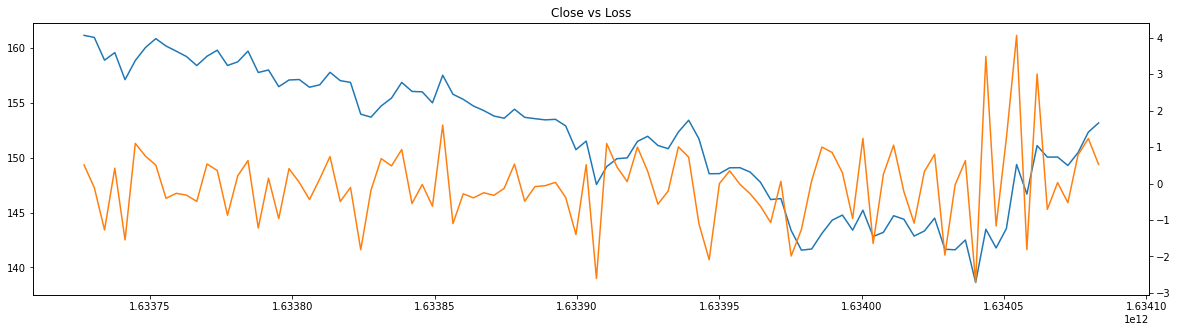

In [5]:
data, events = get_events("cryptodatadownload/Binance_XRPUSDT_1h.csv", 0.6, 0)

### 1 day

##### BTC

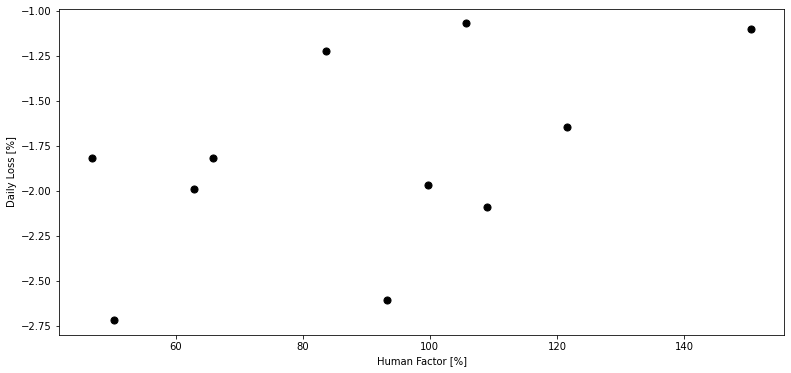

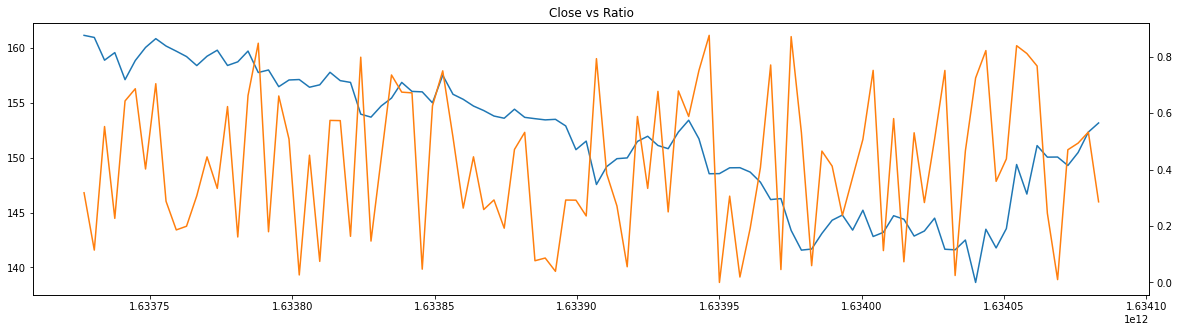

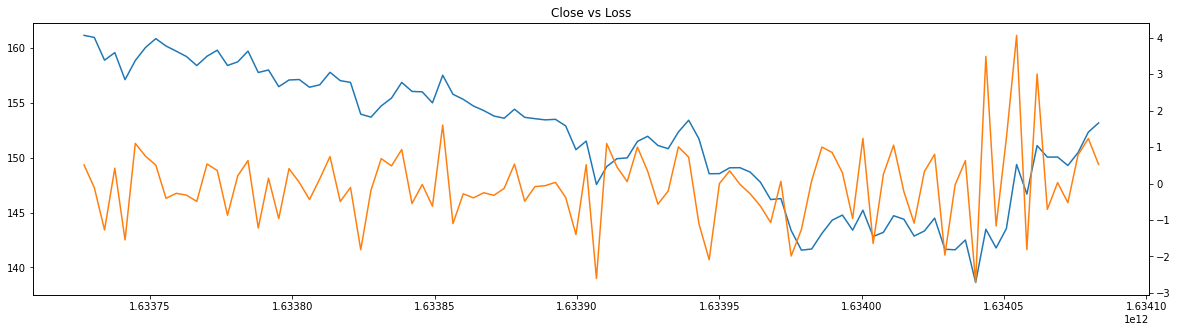

In [6]:
data, events = get_events("cryptodatadownload/Binance_BTCUSDT_d.csv", 0.7, 0)

##### ETH

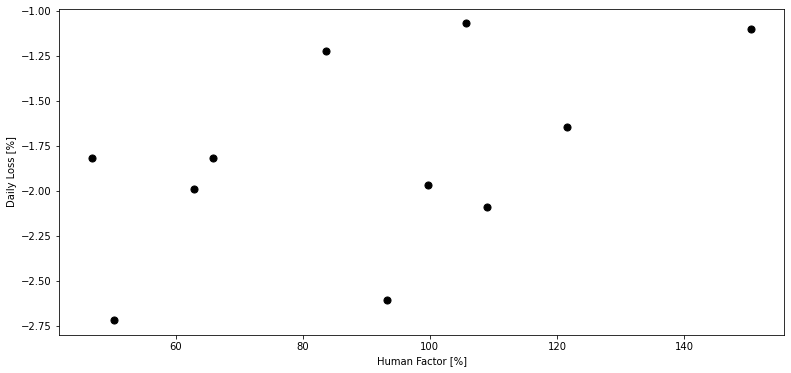

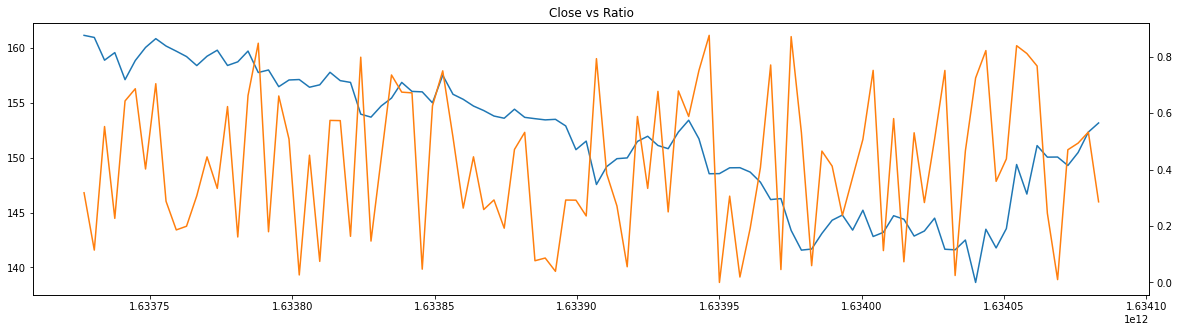

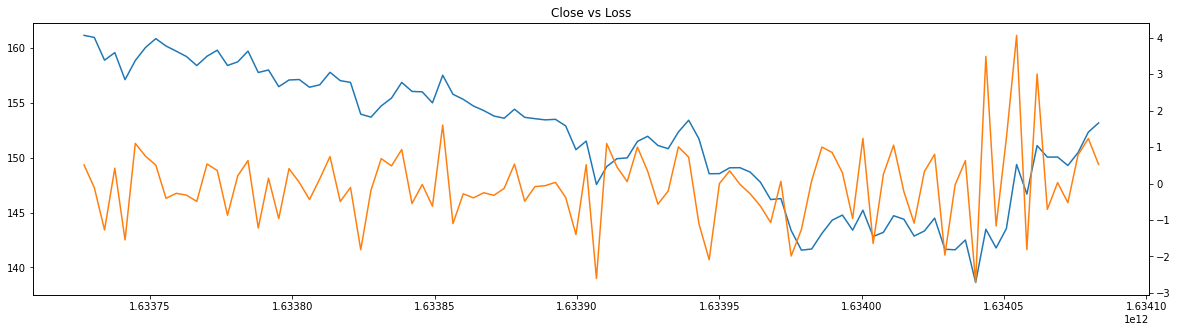

In [7]:
data, events = get_events("cryptodatadownload/Binance_ETHUSDT_d.csv", 0.7, 0)